# Week 8 Lab: Communicating Results

<img align="right" style="padding-left:50px;" src="figures_wk8/puzzle_pieces.png" width=200>

This week we will focus on Telling A Data Story and combining data analysis techniques to answer a single problem statement.

**Dataset::** <br>
This week you will be working with a dataset of your choice. Your dataset should include both categorical and continuous features. <br>
Note: <u> You MAY NOT reuse any of the dataset demonstrated throughout this course or MSDS600</u>.

**Assignment Requirements:** <br>
For this week's assignment, you will use several techniques to analyze a single problem statement and then communicate the results as a data story.

Your data story should be delivered as a PowerPoint(pptx) and include the following:
- Either speaker notes <u>**OR**</u> voice over to tell your story. If you choose:
    * Speaker notes - your notes must be detailed enough to convey the story you are telling
       - Don't make me guess at what you are trying to say!!!
       - Suggestion: 100-250 words per slide
    * Voice-over - your audio must be clear enough for me to understand what you are saying and detailed enough to tell your story
        - Do NOT read to our audience!  Talk to them!
- Your slide deck should consist of
    * Intro slide
    * 7-10 content slides
    * Future works slide
    * Reference slides as needed
- A sample Data Story has been provided for you (TellingADataStory_WomenAndChildrenFirst.pptx)

The analysis of your dataset should include:
* Develop a scenario to provide an overall understanding of the organization represented by your dataset.
* Define a problem statement that you will investigate within your analysis.
* Describe your dataset and how it relates to your analysis.
* If needed, prepare your dataset for analysis.
* Utilize **three different techniques** to investigate your problem statement.
    * Make sure you address any prechecks or conditions associated with your techniques
    * Summarize the insights and/or results for each technique
* Provide an overall conclusion based on your analysis.

Presentation Tips:
* No code in your presentation
* Do not assume that your audience has the same degrees as you
* Relay the significance of any findings


# Deliverables
Upload your Data Story (pptx), your analysis (Jupyter notebook) and a copy of your dataset to the corresponding location in WorldClass.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Scenario:**
HealthTech Solutions is a health technology company developing a new sleep monitoring app called "SleepWell". The app aims to help users track their sleep patterns, stress levels, and overall health to prevent and manage sleep disorders. The company has collected data from a diverse group of individuals to better understand the relationships between various lifestyle factors, stress, sleep duration, and sleep disorders.



**Problem Statement:**

How do stress levels, sleep duration, and other lifestyle factors influence the likelihood of developing sleep disorders? Can we accurately predict the risk of sleep disorders based on these factors?




**Dataset Columns:**
Person ID: An identifier for each individual.(Categorical)

Gender: The gender of the person (Male/Female).(Categorical)

Age: The age of the person in years.(Numeric)

Occupation: The occupation or profession of the person.(Categorical)

Sleep Duration (hours): The number of hours the person sleeps per day.(Numeric)

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.(Numeric)

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.(Numeric)

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.(Numeric)

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).(Categorical)

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.(Categorical)

Heart Rate (bpm): The resting heart rate of the person in beats per minute.(Numeric)

Daily Steps: The number of steps the person takes per day.(Numeric)

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).(Categorical)


**Relationship to Analysis:**
The dependent variable for this analysis is Sleep Disorder (None, Insomnia, Sleep Apnea).

The independent variables include:

Stress Level: Hypothesized to negatively impact sleep health.

Sleep Duration: Hypothesized to be shorter for individuals with sleep disorders.

Quality of Sleep: Provides subjective input on sleep satisfaction.

Physical Activity Level: Expected to improve sleep quality and duration.

BMI Category: Linked to sleep apnea risk, particularly in overweight individuals.

Blood Pressure and Heart Rate: Potential indicators of underlying health conditions affecting sleep.


In [ ]:
df.duplicated().sum()

0

In [ ]:
(df.isna().sum()/len(df))*100

,0
Person ID,0.00000
Gender,0.00000
Age,0.00000
Occupation,0.00000
Sleep Duration,0.00000
Quality of Sleep,0.00000
Physical Activity Level,0.00000
Stress Level,0.00000
BMI Category,0.00000
Blood Pressure,0.00000


In [ ]:
df['Sleep Disorder'].fillna('No Sleep Disorder',inplace=True)

In [ ]:
(df.isna().sum()/len(df))*100

,0
Person ID,0.0
Gender,0.0
Age,0.0
Occupation,0.0
Sleep Duration,0.0
Quality of Sleep,0.0
Physical Activity Level,0.0
Stress Level,0.0
BMI Category,0.0
Blood Pressure,0.0


In [ ]:
# df['Sleep Disorder'] = df['Sleep Disorder'].map({'No Sleep Disorder': 0, 'Sleep Apnea': 1, 'Insomnia': 2})

df['Sleep Disorder'] = df['Sleep Disorder'].map({'No Sleep Disorder': 0, 'Sleep Apnea': 1, 'Insomnia': 1})

Here i want to check between no sleep disorder and for sleep disorder . So i am converting this to binary classification

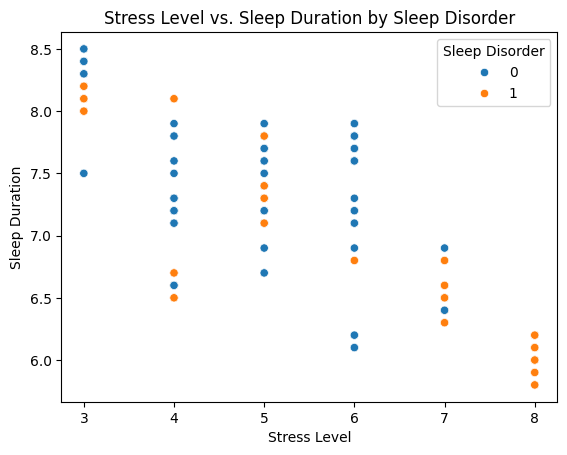

In [ ]:
sns.scatterplot(x='Stress Level', y='Sleep Duration', hue='Sleep Disorder', data=df)
plt.title('Stress Level vs. Sleep Duration by Sleep Disorder')
plt.show()



As stress levels increase, sleep duration tends to decrease. This is evident from the overall trend in the scatter plot.Individuals with and without sleep disorders overlap in the scatter plot, suggesting that stress level alone may not be a definitive predictor of sleep disorders.

Sleep Disorder Impact:
Individuals without Sleep Disorders (Blue): This group shows a wider range of sleep durations across different stress levels.
Individuals with Sleep Disorders (Orange): This group tends to cluster towards the lower end of the sleep duration range, suggesting that they may experience more severe sleep disturbances, especially at higher stress levels.

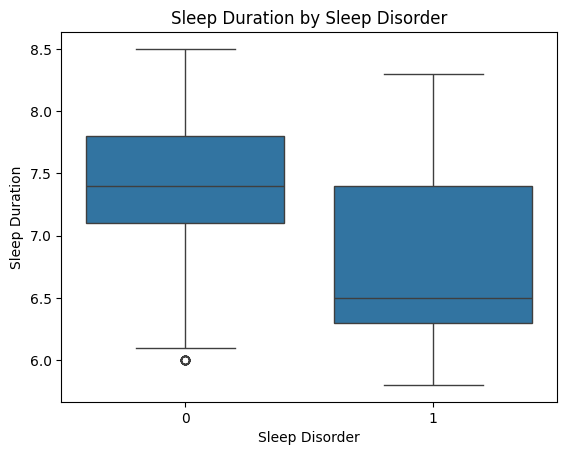

In [ ]:
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Sleep Disorder')
plt.show()

Median Sleep Duration:

No Sleep Disorder: The median sleep duration for individuals without a sleep disorder appears to be around 7.5 hours.
Sleep Disorder: The median sleep duration for individuals with a sleep disorder is around 6.5 hours.

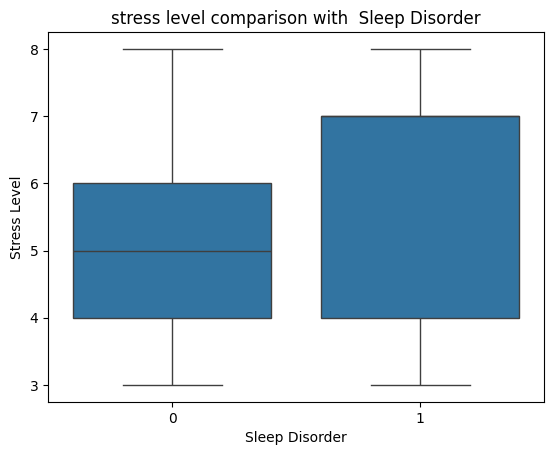

In [ ]:
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df)
plt.title('stress level comparison with  Sleep Disorder')
plt.show()

Median Stress Level:

No Sleep Disorder: The median stress level for individuals without a sleep disorder appears to be around 5.

Sleep Disorder: The median stress level for individuals with a sleep disorder is around 7.

# Logistic Regression Analysis

This is done To predict the occurrence of sleep disorders based on Stress Level and Sleep Duration. Logistic Regression is used because the target variable (Sleep Disorder) is binary

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


X = df[['Stress Level', 'Sleep Duration']]
y = df['Sleep Disorder']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[30 13]
 [12 20]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71        43
           1       0.61      0.62      0.62        32

    accuracy                           0.67        75
   macro avg       0.66      0.66      0.66        75
weighted avg       0.67      0.67      0.67        75



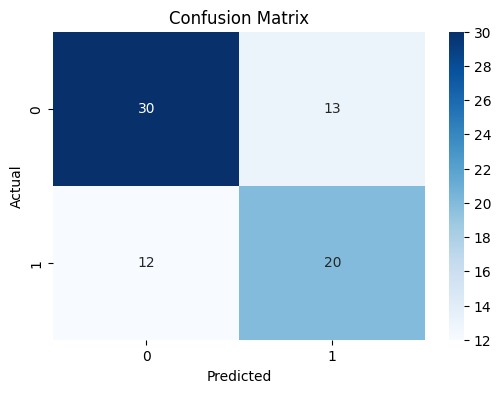

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = [[30, 13],
     [12, 20]]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

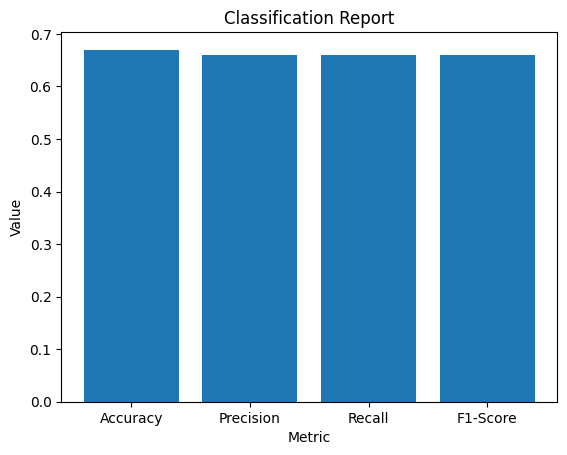

In [ ]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [0.67, 0.66, 0.66, 0.66]

plt.bar(metrics, values)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Classification Report')
plt.show()

The Logistic Regression model identifies a moderate relationship between Stress Level and Sleep Duration and the occurrence of sleep disorders. The accuracy of 67% shows that these features can explain sleep disorders to a certain extent but may require further refinement or additional features.

# Hypothesis Testing (T-tests)

This was done to statistically test if there are significant differences in Sleep Duration and Stress Level between individuals with and without sleep disorders.


Hypothesis 1: Individuals with sleep disorders have significantly shorter sleep duration compared to those without sleep disorders.

Null Hypothesis (H₀): There is no significant difference in sleep duration between individuals with and without sleep disorders.

Alternative Hypothesis(H₁): Individuals with sleep disorders have significantly shorter sleep duration compared to those without sleep disorders.

In [ ]:
import scipy.stats as stats


t_stat, p_value = stats.ttest_ind(df[df['Sleep Disorder'] == 1]['Sleep Duration'],
                                 df[df['Sleep Disorder'] == 0]['Sleep Duration'])

print("T-test results for sleep duration:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. Individuals with sleep disorders have significantly shorter sleep duration compared to those without sleep disorders.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in sleep duration between individuals with and without sleep disorders.")

T-test results for sleep duration:
t-statistic: -6.9411728907765555
p-value: 1.7383790339837897e-11
Reject the null hypothesis. Individuals with sleep disorders have significantly shorter sleep duration compared to those without sleep disorders.


Hypothesis 2: Individuals with sleep disorders have significantly higher stress levels compared to those without sleep disorders.

Null Hypothesis (H₀): There is no significant difference in stress levels between individuals with and without sleep disorders.

Alternative Hypothesis (H₁): Individuals with sleep disorders have significantly higher stress levels compared to those without sleep disorders.

In [ ]:

t_stat, p_value = stats.ttest_ind(df[df['Sleep Disorder'] == 1]['Stress Level'],
                                 df[df['Sleep Disorder'] == 0]['Stress Level'])

print("T-test results for stress level:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in stress levels between individuals with and without sleep disorders.")
else:
    print("Fail to reject the null hypothesis.There is no significant difference in stress levels between individuals with and without sleep disorders.")

T-test results for stress level:
t-statistic: 3.563516215887529
p-value: 0.0004135421034039264
Reject the null hypothesis. There is a significant difference in stress levels between individuals with and without sleep disorders.


Both the hypothesis testing has rejected the null hypothesis.These results strongly support the problem statement as they confirm that higher stress levels and shorter sleep durations are significantly associated with the presence of sleep disorders.

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1


# KMeans Clustering

This was done to explore hidden patterns in the data by grouping individuals based on Stress Level and Sleep Duration and analyze their relationship with sleep disorders.

2: 0.6186074751605315
3: 0.5021560363960755
4: 0.6369086282193575
5: 0.6473581169242467
6: 0.6357124310788818
7: 0.6677860656747673
8: 0.7284660395472025
9: 0.7468570164195283
10: 0.7289991569706675


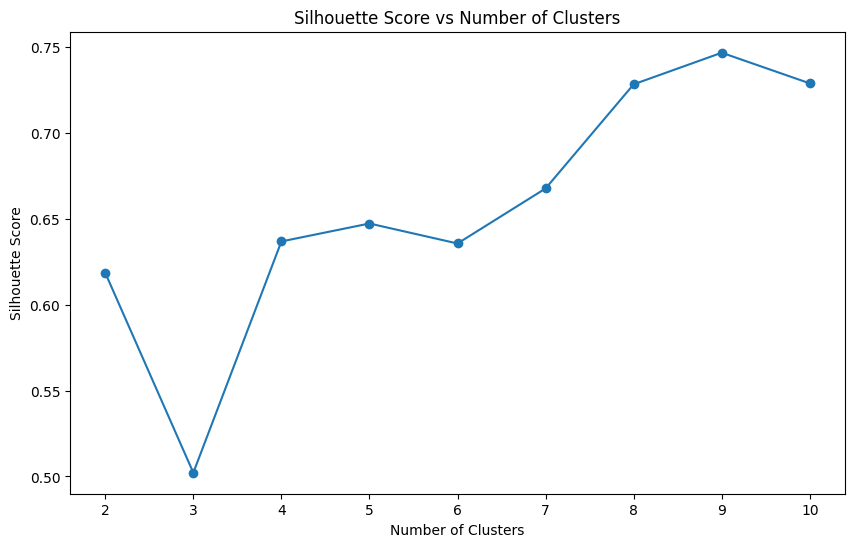

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


X = df[['Stress Level', 'Sleep Duration']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'{k}: {score}')


plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()




In [ ]:

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2


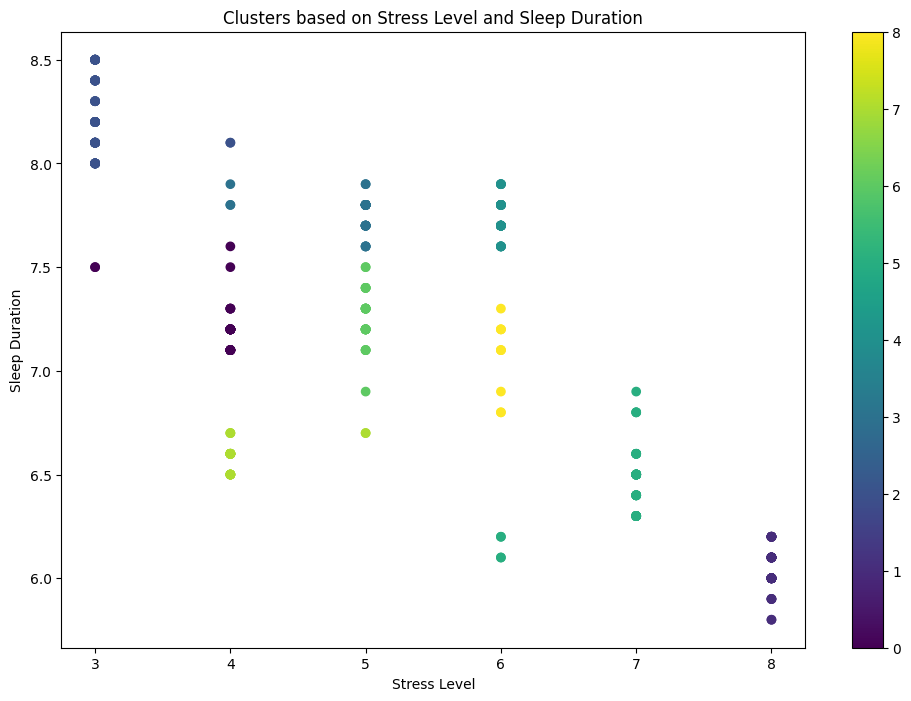

Average Sleep Disorder Occurrence by Cluster:
Cluster
0    0.047619
1    0.528571
2    0.464789
3    0.111111
4    0.031250
5    0.870370
6    0.187500
7    0.851852
8    0.200000
Name: Sleep Disorder, dtype: float64


In [ ]:

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Stress Level'], df['Sleep Duration'], c=df['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title('Clusters based on Stress Level and Sleep Duration')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.show()


cluster_sleep_disorder = df.groupby('Cluster')['Sleep Disorder'].mean()
print("Average Sleep Disorder Occurrence by Cluster:")
print(cluster_sleep_disorder)

Clusters 5 and 7 have high sleep disorder occurrence (>85%), which suggests that these groups have very high stress and low sleep duration levels.
Conversely, clusters 0 and 4 have very low disorder occurrence, suggesting low stress and sufficient sleep.


High-risk clusters (5 and 7) likely represent individuals with high stress and poor sleep duration.

Low-risk clusters (4 and 0) may indicate optimal combinations of stress management and sleep patterns.

Moderate-risk clusters (1, 2, 3, 6, 8) show varying degrees of sleep disorder prevalence, suggesting a complex interplay between factors.

These findings reinforce that Stress Level and Sleep Duration play a critical role in sleep disorder occurrence.

# insights


As stress levels increase, sleep duration tends to decrease. This is evident from the overall trend in the scatter plot'


No Sleep Disorder: The median sleep duration for individuals without a sleep disorder appears to be around 7.5 hours. Sleep Disorder: The median sleep duration for individuals with a sleep disorder is around 6.5 hours.


No Sleep Disorder: The median stress level for individuals without a sleep disorder appears to be around 5.

Sleep Disorder: The median stress level for individuals with a sleep disorder is around 7.


The Logistic Regression model identifies a moderate relationship between Stress Level and Sleep Duration and the occurrence of sleep disorders. The accuracy of 67% shows that these features can explain sleep disorders to a certain extent but may require further refinement or additional features.

These results strongly support the problem statement as they confirm that higher stress levels and shorter sleep durations are significantly associated with the presence of sleep disorders.


Clusters 5 and 7 have high sleep disorder occurrence (>85%), which suggests that these groups have very high stress and low sleep duration levels. Conversely, clusters 0 and 4 have very low disorder occurrence, suggesting low stress and sufficient sleep.


Stress levels and sleep duration significantly impact sleep disorder risk




# summary

To summarize, our analysis provided several key insights. Stress levels and sleep duration play a major role in sleep disorders. Higher stress correlates with shorter sleep, and both factors are more pronounced among individuals with sleep disorders.Our predictive model achieved 67% accuracy and highlighted areas for improvement, such as reducing false negatives. Through K-Means clustering, we identified specific high-risk groups that require targeted interventions. Overall, these findings emphasize the importance of stress management and healthy sleep habits to reduce the risk of sleep disorders.


Box Plots: Visualizations revealed that individuals with sleep disorders tend to have lower sleep duration and higher stress levels compared to those without sleep disorders.

Scatter Plot: The scatter plot confirmed a negative correlation between stress levels and sleep duration, suggesting that higher stress levels are associated with shorter sleep duration.
Hypothesis Testing:

T-tests: Statistical analysis confirmed that individuals with sleep disorders have significantly lower sleep duration and significantly higher stress levels compared to those without sleep disorders.

K-Means Clustering:The K-Means clustering identified nine distinct clusters based on stress levels and sleep duration.
Certain clusters, such as those with high stress and low sleep duration, were associated with a higher prevalence of sleep disorders.

Logistic Regression:A logistic regression model was developed to predict the likelihood of sleep disorders based on stress level and sleep duration.
The model achieved a reasonable level of accuracy, precision, and recall, demonstrating its potential to identify individuals at risk of sleep disorders.

Overall, the analysis provides strong evidence for the relationship between stress, sleep duration, and sleep disorders. The findings suggest that individuals with higher stress levels and lower sleep duration are more likely to experience sleep disorders.